# Predicción de enfermedades cardiovasculares
**Curcio - Ruiz**

**Data Science - Comisión 31500**

**Abstract:** 

Las muertes por enfermedades cardiovasculares suelen ser una de las preocupaciones mas importantes en lo que respecta a la salud humana ya que 1 de cada 3 personas que pierden la vida es debido a causa de enfermedades cardiovasculares; donde se estima que en el mundo cada 4 segundos ocurre un infarto agudo de miocardio y cada 5 segundos un accidente cerebro vascular (Urdánigo-Cedeño et al., 2022). La variable que mas se destaca relacionada a las enfermedades cardio vasculares es la obesidad, ya que se asocia a varios factores de riesgo asociados a la enfermedad como ser, niveles altos de glucosa y colesterol (Llenque et al., 2022) y la hipertensión arterial (Darío et al., 2018).

**INTRODUCCIÓN**

Elegimos un dataset que contiene observaciones de 70000 pacientes con 22 variables. Entre la información con la que contamos se encuentra la edad, el peso y altura, género, presión arterial sistólica (Presión ejercida cuando la sangre es expulsada en las arterias), presión arterial diastólica (Presión de la sangre en la arteria cuando el corazón se relaja entre latidos), resultados de exámenes de colesterol y glucosa, si el paciente fuma o bebe alcohol y presencia de enfermedades cardiovasculares previas. La mayoría de las personas tienen enfermedades cardiovasculares debido a sus malos hábitos. Usaremos estos datos para determinar cuáles son los factores que causan estas enfermedades. Dado que, contamos con las variables necesarias para analizar el comportamiento de las enfermedades en relación a género, hábitos y edad, nuestro objetivo es usar estos datos para hacer un análisis de enfermedades cardiovasculares en base a la información obtenida, analizando si existe una relación entre las caracteristicas de un paciente y los resultados de sus exámenes. A futuro, intentaremos predecir enfermedades cardiovasculares en base a los datos con los que contamos. La pregunta general es:

¿Que factores de riesgo pueden ser predictivos de contraer una enfermedad cardiaca?

En esta oportunidad realizaremos un primer acercamiento a los datos, planteando algunas preguntas que serviran como guias para cumplir dicho objetivo:

1. ¿Hay alguna relacion entre la edad y la presion arterial (sistolica)?

2. ¿Hay alguna relacion entre el sueño y la presion arterial (sistolica)?

3. ¿Como se comportan los valores de la presion arterial (sistolica) a medida de que aumentan los niveles de colesterol?

4. ¿Hay alguna diferencia entre los niveles de colesterol según el género?


**Objetivo:**

En este sentido el presente estudio se propone investigar si las dos variables mencionadas pueden ser predictoras de contraer enfermedades cardio vasculares, y además nos proponemos a explorar otros factores de riesgo posibles como ser las horas de sueño, la edad y hábitos como ser el fumar.

**Contexto Comercial:**

El Director de un hospital busca la forma de dar prioridad a pacientes que solicitan estudios relacionadas al sector de cardiología. Cuando un paciente asiste a su primer consulta, se completa un formulario con información básica tal como edad, sexo, presión arterial sistólica, presión arterial diastólica, etc. Es nuestro deber trabajar con esa información para determinar que pacientes necesitan ser atendidos con mayor prioridad.

**Problema Comercial:**

Debemos buscar patrones de comportamientos que nos sirvan para determinar si un paciente corre algun riesgo grave para que pueda ser antendido lo antes posible.

**Contexto Analítico:**

Tenemos los datos de 70000 pacientes que fueron atendidos en el hospital y han completado el formulario para el análsis. Lo que estamos buscando es predecir si el paciente tiene una enfermedad o no. Para eso contamos con un conjunto de datos etiquetados y por lo tanto debemos considerar un aprendizaje supervisado.

**Preguntas:**

**General:** ¿Que factores de riesgo pueden ser predictivos de contraer una enfermedad cardio vascular?

**Especificas:**

1. ¿Existe una relación entre el nivel de colesterol y la posibilidad de contraer una enfermedad cardio vascular?

2. ¿Existe una relación entre el nivel de glucosa y la posibilidad de contraer una enfermedad cardio vascular?

3. ¿Existe una relación entre la obesidad (altos niveles de glucosa y de colesterol) y de contraer una enfermedad cardio vascular?

4. ¿Existe una relación entre la presión arterial sistólica y la posibilidad de contraer una enfermedad cardio vascular?

5. ¿Existe una relación entre la presión arterial diastólica y la posibilidad de contraer una enfermedad cardio vascular?

6. ¿Existen otros factores que podrían llevar a contraer una enfermedad cardio vascular?

**Hipótesis:**

1. Existe una correlación positiva entre el nivel de colesterol y la presión arterial alta sistólica.

2. Existe una correlación positiva entre el nivel de colesterol y la presión arterial alta diastólica.

3. Existe una correlación positiva entre el nivel de glucosa y la presión arterial alta sistólica.

4. Existe una correlación positiva entre el nivel de glucosa y la presión arterial alta diastólica.

5. Altos niveles de glucosa y colesterol son predictores de contraer una enfermedad cardio vascular.

6. Presion arterial sistólica alta y presión arterial diastólica alta son predictores de contraer una enfermedad cardio vascular.

7. Fumar en conjunto con altos niveles de glucosa y colesterol, con presión arterial sistólica y diastólica alta es predictivo de contraer una enfermedad cardio vascular.

8. Horas de sueño bajas en conjunto con altos niveles de glucosa y colesterol, con presión arterial sistólica y diastólica alta es predictivo de contraer una enfermedad cardio vascular.

**Cargamos los módulos a utilizar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector
!pip install kaggle

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
import pandas_profiling

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


**Cargamos los datos a utilizar**

In [ ]:
#SE CARGAN LOS DATOS
url='https://drive.google.com/file/d/1HHEFctOru73NMkp_e6N6qsExp2Qh8Sou/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_data_cardio = pd.read_csv(url,sep=',')
df_data_cardio

id    age  age_years  gender  height  weight  ap_hi  ap_lo  \
0          0  18393         50  Hombre     168      62    110     80   
1          1  20228         55   Mujer     156      85    140     90   
2          2  18857         52   Mujer     165      64    130     70   
3          3  17623         48  Hombre     169      82    150    100   
4          4  17474         48   Mujer     156      56    100     60   
...      ...    ...        ...     ...     ...     ...    ...    ...   
69995  69995  19240         53  Hombre     168      76    120     80   
69996  69996  22601         62   Mujer     158     126    140     90   
69997  69997  19066         52  Hombre     183     105    180     90   
69998  69998  22431         61   Mujer     163      72    135     80   
69999  69999  20540         56   Mujer     170      72    120     80   

       cholesterol  gluc  ...  zone_residence  couple  family_history    PAS  \
0                1     1  ...           Urban       1               0  110.0   
1                3     1  ...           Urban       0               1  140.0   
2                3     1  ...           Urban       1               1  130.0   
3                1     1  ...           Urban       0               1  150.0   
4                1     1  ...           Urban       1               0  100.0   
...            ...   ...  ...             ...     ...             ...    ...   
69995            1     1  ...           Urban       1               0  120.0   
69996            2     2  ...           Urban       0               0  140.0   
69997            3     1  ...           Urban       1               1  180.0   
69998            1     2  ...           Urban       0               0  135.0   
69999            2     1  ...           Urban       0               0  120.0   

         PAD   PAS_R   PAD_R   PAS_C  PAD_C  Unnamed: 25  
0       80.0  Normal  Normal  111.10   80.8          NaN  
1       90.0  Normal  Normal  142.80   91.8          NaN  
2       70.0  Normal  Riesgo  132.60   71.4          NaN  
3      100.0  Riesgo  Normal  153.00  102.0          NaN  
4       70.0  Normal  Riesgo  101.00   70.7          NaN  
...      ...     ...     ...     ...    ...          ...  
69995   80.0  Normal  Normal  121.20   80.8          NaN  
69996   90.0  Normal  Normal  142.80   91.8          NaN  
69997   90.0  Riesgo  Normal  183.60   91.8          NaN  
69998   80.0  Normal  Normal  136.35   80.8          NaN  
69999   80.0  Normal  Normal  121.20   80.8          NaN  

[70000 rows x 26 columns]

**ANALISIS EXPLORATORIO DE DATOS Y DATA WRANGLING**

In [ ]:
#Eliminando columnas innecesarias
df_data_cardio.drop(columns = ["id","zone_residence","PAS_R","PAD_R","couple","PAS","PAD","PAS_C","PAD_C", "Unnamed: 25"],axis=1,inplace=True)
df_data_cardio = df_data_cardio.loc[:, ~df_data_cardio.columns.str.contains('^Unnamed')]

#Convirtiendo Genero a binario
df_data_cardio['gender'] = df_data_cardio['gender'].replace(['Hombre', 'Mujer'], [0, 1])

In [ ]:
#Buscando datos nulos
missing_data = df_data_cardio.isnull()
#missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

age
False    70000
Name: age, dtype: int64

age_years
False    70000
Name: age_years, dtype: int64

gender
False    70000
Name: gender, dtype: int64

height
False    70000
Name: height, dtype: int64

weight
False    70000
Name: weight, dtype: int64

ap_hi
False    70000
Name: ap_hi, dtype: int64

ap_lo
False    70000
Name: ap_lo, dtype: int64

cholesterol
False    70000
Name: cholesterol, dtype: int64

gluc
False    70000
Name: gluc, dtype: int64

smoke
False    70000
Name: smoke, dtype: int64

alco
False    70000
Name: alco, dtype: int64

active
False    70000
Name: active, dtype: int64

cardio_d
False    70000
Name: cardio_d, dtype: int64

sleep_hours
False    70000
Name: sleep_hours, dtype: int64

sleep_hours_c
False    70000
Name: sleep_hours_c, dtype: int64

family_history
False    70000
Name: family_history, dtype: int64



**Buscando datasets complementarios:**
Buscamos un dataset que se relacione con el de enfermedades cardio vasculares, en este caso, conseguimos el de hábitos de ejercicio, peso y sueño, ya que los hábitos insalubres pueden propiciar la aparicion de enfermedades vasculares, sobre todo el colesterol alto. Con estos datasets podremos generar recomendaciones sobre hábitos saludables, sobre todo enfocados en el deporte, que disminuyan el colesterol y así el riesgo a contraer enfermedades cardiovasculares

**Pasos complementarios**

Sacamos el dataset de la api de kaggle debido a que no encontramos apis gratuitas de salud:

`import requests`

`import json`

`import http.client`

`!pip install kaggle`

Kaggle solicitaba que el archivo 'kaggle.json' este en la carpeta creada para obtener los permisos:

`!mkdir C:\Users\Juanma\.kaggle`

Se realiza la busqueda:

`!kaggle  datasets list -s 'Fitbit-Fitness'`

Se descarga el data set:

`!kaggle datasets download -d mjazzy/fitbit-fitness-bellabeat-high-tech-company`

El dataset Activity nos parece el mas relevante para acompañar el analisis del data set df_data_cardio.

Se carga la tabla a Google Drive para mayor comodidad y se realizan las exploraciones correspondientes:

In [ ]:
#SE CARGAN LOS DATOS DEL DATASET COMPLEMENTARIO
url= 'https://drive.google.com/file/d/1hAMZGn_u_jdtQOlYwzK4BYexN2oUFm-k/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
Activity = pd.read_csv(url,sep=',')

In [ ]:
#COLUMNAS
Activity_c = len(Activity.columns)
print('El total de columnas es: ',Activity_c)
#FILAS
print('El total de filas es: ',len(Activity))

El total de columnas es:  15
El total de filas es:  940


In [ ]:
Activity.head(5)

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863

In [ ]:
#DATA WRANGLING
#Revisamos Duplicados
#Es importante que no los haya en la columna ID ya que indica unidades de analisis repetidas
Activity_nd = Activity.drop_duplicates('Id')
Activity_nd

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2016       13162           8.50             8.50   
31   1624580081    4/12/2016        8163           5.31             5.31   
62   1644430081    4/12/2016       10694           7.77             7.77   
92   1844505072    4/12/2016        6697           4.43             4.43   
123  1927972279    4/12/2016         678           0.47             0.47   
154  2022484408    4/12/2016       11875           8.34             8.34   
185  2026352035    4/12/2016        4414           2.74             2.74   
216  2320127002    4/12/2016       10725           7.49             7.49   
247  2347167796    4/12/2016       10113           6.83             6.83   
265  2873212765    4/12/2016        8796           5.91             5.91   
296  3372868164    4/12/2016        4747           3.24             3.24   
316  3977333714    4/12/2016        8856           5.98             5.98   
346  4020332650    4/12/2016        8539           6.12             6.12   
377  4057192912    4/12/2016        5394           4.03             4.03   
381  4319703577    4/12/2016        7753           5.20             5.20   
412  4388161847    4/12/2016       10122           7.78             7.78   
443  4445114986    4/12/2016        3276           2.20             2.20   
474  4558609924    4/12/2016        5135           3.39             3.39   
505  4702921684    4/12/2016        7213           5.88             5.88   
536  5553957443    4/12/2016       11596           7.57             7.57   
567  5577150313    4/12/2016        8135           6.08             6.08   
597  6117666160    4/12/2016           0           0.00             0.00   
625  6290855005    4/12/2016        4562           3.45             3.45   
654  6775888955    4/12/2016           0           0.00             0.00   
680  6962181067    4/12/2016       10199           6.74             6.74   
711  7007744171    4/12/2016       14172          10.29             9.48   
737  7086361926    4/12/2016       11317           8.41             8.41   
768  8053475328    4/12/2016       18060          14.12            14.12   
799  8253242879    4/12/2016        9033           7.16             7.16   
818  8378563200    4/12/2016        7626           6.05             6.05   
849  8583815059    4/12/2016        5014           3.91             3.91   
880  8792009665    4/12/2016        2564           1.64             1.64   
909  8877689391    4/12/2016       23186          20.40            20.40   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                    0.000000                1.88                      0.55   
31                   0.000000                0.00                      0.00   
62                   0.000000                0.14                      2.30   
92                   0.000000                0.00                      0.00   
123                  0.000000                0.00                      0.00   
154                  0.000000                3.31                      0.77   
185                  0.000000                0.19                      0.35   
216                  0.000000                1.17                      0.31   
247                  0.000000                2.00                      0.62   
265                  0.000000                0.11                      0.93   
296                  0.000000                0.00                      0.00   
316                  0.000000                3.06                      0.91   
346                  0.000000                0.15                      0.24   
377                  0.000000                0.00                      0.00   
381                  0.000000                0.00                      0.00   
412                  0.000000                0.00                      0.00   
443                  0.000000                0.00                      0.00   
474   

**Pasos extras:** 
En el dataset *Activity_nd* no deberia haber valores con 0 en la columna "LoggedActivitiesDistance", ya que significa que la persona no registró la actividad y no significa que no realizó ejercicio

In [ ]:
#Reemplazamos por NaN
cols = ['LoggedActivitiesDistance']
Activity_nd[cols].replace({'0':np.NaN, 0:np.NaN})

LoggedActivitiesDistance
0                         NaN
31                        NaN
62                        NaN
92                        NaN
123                       NaN
154                       NaN
185                       NaN
216                       NaN
247                       NaN
265                       NaN
296                       NaN
316                       NaN
346                       NaN
377                       NaN
381                       NaN
412                       NaN
443                       NaN
474                       NaN
505                       NaN
536                       NaN
567                       NaN
597                       NaN
625                       NaN
654                       NaN
680                       NaN
711                  4.869783
737                       NaN
768                       NaN
799                       NaN
818                  2.253081
849                       NaN
880                       NaN
909                       NaN

In [ ]:
Activity_nd.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [ ]:
Activity_nd.head(5)

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2016       13162           8.50             8.50   
31   1624580081    4/12/2016        8163           5.31             5.31   
62   1644430081    4/12/2016       10694           7.77             7.77   
92   1844505072    4/12/2016        6697           4.43             4.43   
123  1927972279    4/12/2016         678           0.47             0.47   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
31                        0.0                0.00                      0.00   
62                        0.0                0.14                      2.30   
92                        0.0                0.00                      0.00   
123                       0.0                0.00                      0.00   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                      0.0                 25   
31                  5.31                      0.0                  0   
62                  5.33                      0.0                  2   
92                  4.43                      0.0                  0   
123                 0.47                      0.0                  0   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
31                     0                   146              1294      1432  
62                    51                   256              1131      3199  
92                     0                   339              1101      2030  
123                    0                    55               734      2220

### Ya tenemos todo preparado para realizar un análisis sobre los datos obtenidos.

In [ ]:
#SE EXPLORAN CORRELACIONES
df_data_cardio.corr(method='pearson', min_periods=1)

age  age_years    gender    height    weight     ap_hi  \
age             1.000000   0.999090  0.022811 -0.081515  0.053682  0.020764   
age_years       0.999090   1.000000  0.023017 -0.081456  0.053659  0.020793   
gender          0.022811   0.023017  1.000000 -0.499033 -0.155412 -0.006005   
height         -0.081515  -0.081456 -0.499033  1.000000  0.290966  0.005488   
weight          0.053682   0.053659 -0.155412  0.290966  1.000000  0.030702   
ap_hi           0.020764   0.020793 -0.006005  0.005488  0.030702  1.000000   
ap_lo           0.017647   0.017754 -0.015254  0.006150  0.043711  0.016086   
cholesterol     0.154424   0.154386  0.035821 -0.050226  0.141763  0.023778   
gluc            0.098703   0.098596  0.020491 -0.018595  0.106859  0.011841   
smoke          -0.047633  -0.047884 -0.338135  0.187989  0.067779 -0.000922   
alco           -0.029723  -0.029918 -0.170966  0.094419  0.067115  0.001408   
active         -0.009927  -0.009819 -0.005866 -0.006570 -0.016865 -0.000033   
cardio_d        0.238159   0.237749 -0.008109 -0.010821  0.181656  0.054475   
sleep_hours    -0.170826  -0.170758  0.034000  0.010713 -0.226317 -0.084867   
sleep_hours_c  -0.170360  -0.170287  0.033875  0.010445 -0.226246 -0.084852   
family_history  0.136554   0.136149  0.001573 -0.010330  0.098601  0.023591   

                   ap_lo  cholesterol      gluc     smoke      alco    active  \
age             0.017647     0.154424  0.098703 -0.047633 -0.029723 -0.009927   
age_years       0.017754     0.154386  0.098596 -0.047884 -0.029918 -0.009819   
gender         -0.015254     0.035821  0.020491 -0.338135 -0.170966 -0.005866   
height          0.006150    -0.050226 -0.018595  0.187989  0.094419 -0.006570   
weight          0.043711     0.141763  0.106859  0.067779  0.067115 -0.016865   
ap_hi           0.016086     0.023778  0.011841 -0.000922  0.001408 -0.000033   
ap_lo           1.000000     0.024019  0.010806  0.005186  0.010601  0.004780   
cholesterol     0.024019     1.000000  0.451578  0.010354  0.035760  0.009911   
gluc            0.010806     0.451578  1.000000 -0.004756  0.011246 -0.006770   
smoke           0.005186     0.010354 -0.004756  1.000000  0.340094  0.025858   
alco            0.010601     0.035760  0.011246  0.340094  1.000000  0.025476   
active          0.004780     0.009911 -0.006770  0.025858  0.025476  1.000000   
cardio_d        0.065719     0.221147  0.089307 -0.015486 -0.007330 -0.035653   
sleep_hours    -0.096699    -0.197274 -0.094581 -0.027869 -0.033844  0.001698   
sleep_hours_c  -0.096481    -0.196918 -0.094624 -0.027746 -0.033854  0.001706   
family_history  0.039661     0.124144  0.052329 -0.008972 -0.004307 -0.018347   

                cardio_d  sleep_hours  sleep_hours_c  family_history  
age             0.238159    -0.170826      -0.170360        0.136554  
age_years       0.237749    -0.170758      -0.170287        0.136149  
gender         -0.008109     0.034000       0.033875        0.001573  
height         -0.010821     0.010713       0.010445       -0.010330  
weight          0.181656    -0.226317      -0.226246        0.098601  
ap_hi           0.054475    -0.084867      -0.084852        0.023591  
ap_lo           0.065719    -0.096699      -0.096481        0.039661  
cholesterol     0.221147    -0.197274      -0.196918        0.124144  
gluc            0.089307    -0.094581      -0.094624        0.052329  
smoke          -0.015486    -0.027869      -0.027746       -0.008972  
alco           -0.007330    -0.033844      -0.033854       -0.004307  
active         -0.035653     0.001698       0.001706       -0.018347  
cardio_d        1.000000    -0.373731      -0.372838        0.576640  
sleep_hours    -0.373731     1.000000       0.997668       -0.210949  
sleep_hours_c  -0.372838     0.997668       1.000000       -0.210678  
family_history  0.576640    -0.210949      -0.210678        1.000000

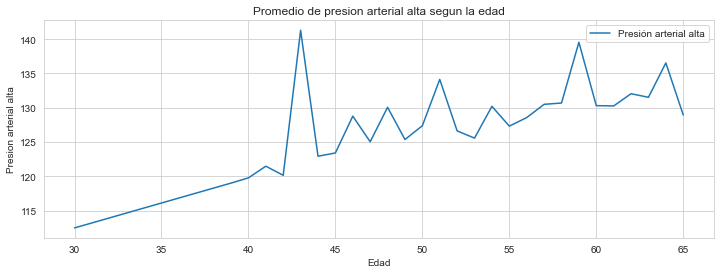

In [ ]:
#EXISTE ALGUNA RELACION ENTRE LA EDAD Y LA PRESION ARTERIAL SISTOLICA?
PromedioEdadAP = df_data_cardio.groupby(['age_years']).agg({'ap_hi' :['mean']})
fig, ax = plt.subplots(figsize=(12, 4))  
ax.plot(PromedioEdadAP.index, PromedioEdadAP.mean(axis='columns'), label='Presión arterial alta')
ax.set_xlabel('Edad')  						# Etiqueta eje x
ax.set_ylabel('Presion arterial alta')  	# Etiqueta eje y
ax.set_title('Promedio de presion arterial alta segun la edad') 	# Título
ax.legend() 					 # Inserto la leyenda

**A los 58 años de edad se puede apreciar la maxima presion arterial alta observada**

<AxesSubplot:xlabel='cholesterol', ylabel='ap_hi'>

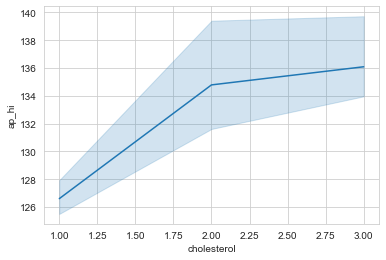

In [ ]:
#COLESTEROL Y PRESION ARTERIAL SISTOLICA
sns.lineplot(data=df_data_cardio, x='cholesterol', y='ap_hi')

<AxesSubplot:xlabel='cholesterol', ylabel='ap_lo'>

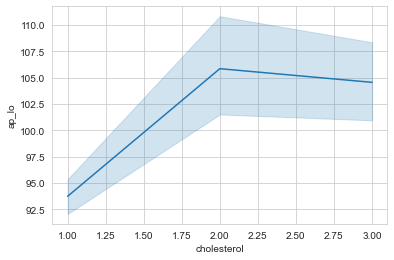

In [ ]:
#COLESTEROL Y PRESION ARTERIAL DIASTOLICA
sns.lineplot(data=df_data_cardio, x='cholesterol', y='ap_lo')

**Observamos que existe una relación entre el colesterol y las presiones arteriales**

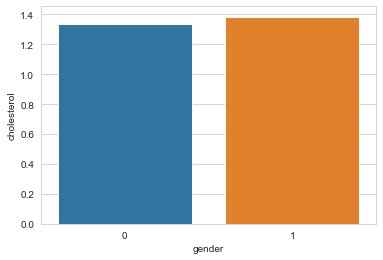

In [ ]:
#COLESTEROL Y GENERO
bar_gen_cho = sns.barplot(data=df_data_cardio, x='gender', y='cholesterol', ci=None) #0 MASCULINO 1 FEMENINO

**En un primer acercamiento, parece no haber diferencias significativas relacionadas al sexo.**

## Probamos con un modelo predictivo

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = df_data_cardio.drop('cardio_d', axis=1)
y = df_data_cardio['cardio_d']
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Utilizamos el método Forward selection para reducir la dimensionalidad del dataset
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
k_features=5, ##Numero de entidades a seleccionar
forward=True, ##son para la técnica de selección hacia adelante
floating=False,
verbose=2,  ##se utiliza para registrar el progreso del selector de características
scoring='roc_auc', ##define los criterios de evaluación del desempeño
cv=4  ##pliegues de validación cruzada.
) 

In [ ]:
#Entrenamos el modelos con los datos de "Training"
features = feature_selector.fit(X_train, y_train)
filtered_features= X_train.columns[list(features.k_feature_idx_)]
filtered_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.5s finished

[2022-10-29 13:58:08] Features: 1/5 -- score: 0.7524953175884631[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   11.3s finished

[2022-10-29 13:58:20] Features: 2/5 -- score: 0.8776972234351641[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   10.0s finished

[2022-10-29 13:58:30] Features: 3/5 -- score: 0.8920151020858981[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Index(['age_years', 'ap_hi', 'cholesterol', 'alco', 'family_history'], dtype='object')

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(X_train[filtered_features].fillna(0), y_train)

train_pred = clf.predict_proba(X_train[filtered_features].fillna(0))
print('Exactitud con los datos de Training: {}'.format(roc_auc_score(y_train, train_pred[:,1])))

test_pred = clf.predict_proba(X_test[filtered_features].fillna(0))
print('Exactitud con los datos de Test: {}'.format(roc_auc_score(y_test, test_pred [:,1])))

Exactitud con los datos de Training: 0.896883177536286
Exactitud con los datos de Test: 0.8950504898535634


### Observamos que para ambos conjuntos de datos obtenemos la misma exactitud, por lo que consideramos que el modelo pueda analizar correctamente cuando se ejecute datos nuevos.

In [ ]:
#EVALUANDO SI HAY OVERFITTING O UNDERFITTING

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = df_data_cardio.drop('cardio_d', axis=1)
y = df_data_cardio['cardio_d']
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defecto
modelo = RandomForestClassifier(random_state=1)
#Entrenamos el modelos con los datos de "Training"
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#Obtenemos las predicciones del modelo con los datos de "Training"
X_train_preds = modelo.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_preds, y_train)
print('Exactitud con los datos de Training: ', training_data_accuracy)

Exactitud con los datos de Training:  0.9999821428571428


In [ ]:
#Obtenemos las predicciones del modelo con los datos de "Test"
X_test_preds = modelo.predict(X_test)
test_data_accuracy = metrics.accuracy_score(X_test_preds, y_test)
print('Exactitud con los datos de Test: ', test_data_accuracy)

Exactitud con los datos de Test:  0.8185714285714286


### Observaciones:

La exactitud con el modelo de datos de Training es del 99%, y la brecha con el modelo de Test es significativa. Por lo tanto podríamos estar ante una situación de overfitting. Nuestro modelo aprendió los datos de Training perfectamente, no es capaz de generalizar y cuando le llegan nuevos datos los resultados no son los esperados. Podríamos prevenir ésto ajustando el porcentaje de datos utilizados para entrenamiento/test o reduciendo los parámetros de nuestros modelos mediante técnicas de feature selection.

### CONCLUSIONES PRELIMINARES

1. Existe una correlación positiva entre el nivel de colesterol y la presión arterial alta sistólica.

2. Existe una correlación positiva entre el nivel de colesterol y la presión arterial alta diastólica.

3. Existe una correlación positiva entre el nivel de glucosa y la presión arterial alta sistólica.

4. Existe una correlación positiva entre el nivel de glucosa y la presión arterial alta diastólica.

5. Altos niveles de glucosa y colesterol son predictores de contraer una enfermedad cardio vascular.

6. Presion arterial sistólica alta y presión arterial diastólica alta son predictores de contraer una enfermedad cardio vascular.

7. Fumar en conjunto con altos niveles de glucosa y colesterol, con presión arterial sistólica y diastólica alta es predictivo de contraer una enfermedad cardio vascular.

8. Horas de sueño bajas en conjunto con altos niveles de glucosa y colesterol, con presión arterial sistólica y diastólica alta es predictivo de contraer una enfermedad cardio vascular.

En síntesis, lo estudiado hasta el momento corrobora los resultados anteriores que encuentran relación entre el colesterol y las enfermedades cardio vasculares. Por otro lado, la originalidad de este proyecto reside en la posibilidad de incluir hábitos de vida, como ser, la actividad física, en el modelo de este estudio.

Desde este momento nos dedicaremos a explorar algunas relaciones más, y sobre todas las cosas, a resolver los problemas relacionados con el overfitting; de todas formas, debido a los datos explorados podemos estimar que este proyecto nos permitirá generar un modelo predictivo de las distintas variables que pueden estar relacionadas con la adquisición de una enfermedad cardiaca. En otras palabras, este proyecto nos permitirá detectar hábitos de vida insalubres para poder trabajar en ello y de este modo prevenir la aparición de enfermedades cardiacas y mejorar así la salud de las personas.

## INSIGHTS, correspondientes con el desafio "Obtención de Insights"

In [ ]:
#DATA WRANGLING PARA CORRELACIONES CON HEAT MAP
df_data_cardio

age  age_years  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0      18393         50       0     168      62    110     80            1   
1      20228         55       1     156      85    140     90            3   
2      18857         52       1     165      64    130     70            3   
3      17623         48       0     169      82    150    100            1   
4      17474         48       1     156      56    100     60            1   
...      ...        ...     ...     ...     ...    ...    ...          ...   
69995  19240         53       0     168      76    120     80            1   
69996  22601         62       1     158     126    140     90            2   
69997  19066         52       0     183     105    180     90            3   
69998  22431         61       1     163      72    135     80            1   
69999  20540         56       1     170      72    120     80            2   

       gluc  smoke  alco  active  cardio_d  sleep_hours  sleep_hours_c  \
0         1      0     0       1         0            7           7.28   
1         1      0     0       1         1            5           5.05   
2         1      0     0       0         1            6           6.06   
3         1      0     0       1         1            5           5.15   
4         1      0     0       0         0            9           9.27   
...     ...    ...   ...     ...       ...          ...            ...   
69995     1      1     0       1         0            9           9.36   
69996     2      0     0       1         1            6           6.06   
69997     1      0     1       0         1            6           6.30   
69998     2      0     0       0         1            6           6.12   
69999     1      0     0       1         0            9           9.09   

       family_history  
0                   0  
1                   1  
2                   1  
3                   1  
4                   0  
...               ...  
69995               0  
69996               0  
69997               1  
69998               0  
69999               0  

[70000 rows x 16 columns]

In [ ]:
df_data_cardio_corr = df_data_cardio

In [ ]:
df_data_cardio_corr

age  age_years  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0      18393         50       0     168      62    110     80            1   
1      20228         55       1     156      85    140     90            3   
2      18857         52       1     165      64    130     70            3   
3      17623         48       0     169      82    150    100            1   
4      17474         48       1     156      56    100     60            1   
...      ...        ...     ...     ...     ...    ...    ...          ...   
69995  19240         53       0     168      76    120     80            1   
69996  22601         62       1     158     126    140     90            2   
69997  19066         52       0     183     105    180     90            3   
69998  22431         61       1     163      72    135     80            1   
69999  20540         56       1     170      72    120     80            2   

       gluc  smoke  alco  active  cardio_d  sleep_hours  sleep_hours_c  \
0         1      0     0       1         0            7           7.28   
1         1      0     0       1         1            5           5.05   
2         1      0     0       0         1            6           6.06   
3         1      0     0       1         1            5           5.15   
4         1      0     0       0         0            9           9.27   
...     ...    ...   ...     ...       ...          ...            ...   
69995     1      1     0       1         0            9           9.36   
69996     2      0     0       1         1            6           6.06   
69997     1      0     1       0         1            6           6.30   
69998     2      0     0       0         1            6           6.12   
69999     1      0     0       1         0            9           9.09   

       family_history  
0                   0  
1                   1  
2                   1  
3                   1  
4                   0  
...               ...  
69995               0  
69996               0  
69997               1  
69998               0  
69999               0  

[70000 rows x 16 columns]

In [ ]:
#ELIMINAMOS COLUMNAS QUE NO VAN A SER NECESARIAS EN EL HEAT MAP
df_data_cardio_corr.drop(columns = ["age","smoke","active","family_history","cardio_d","alco","gender","sleep_hours"],axis=1,inplace=True)

In [ ]:
df_data_cardio_corr.describe()

age_years        height        weight         ap_hi         ap_lo  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      53.338686    164.359229     74.205543    128.817286     96.630414   
std        6.765294      8.210126     14.395829    154.011419    188.472530   
min       30.000000     55.000000     10.000000   -150.000000    -70.000000   
25%       48.000000    159.000000     65.000000    120.000000     80.000000   
50%       54.000000    165.000000     72.000000    120.000000     80.000000   
75%       58.000000    170.000000     82.000000    140.000000     90.000000   
max       65.000000    250.000000    200.000000  16020.000000  11000.000000   

        cholesterol          gluc  sleep_hours_c  
count  70000.000000  70000.000000   70000.000000  
mean       1.366871      1.226457       7.146896  
std        0.680250      0.572270       1.467885  
min        1.000000      1.000000       4.040000  
25%        1.000000      1.000000       6.060000  
50%        1.000000      1.000000       7.210000  
75%        2.000000      1.000000       8.320000  
max        3.000000      3.000000       9.450000

In [ ]:
df_data_cardio_corr.head(2)

age_years  height  weight  ap_hi  ap_lo  cholesterol  gluc  sleep_hours_c
0         50     168      62    110     80            1     1           7.28
1         55     156      85    140     90            3     1           5.05

In [ ]:
#Generamos una matriz de correlaciones
df_data_cardio_corr.corr(method='pearson', min_periods=1)

age_years    height    weight     ap_hi     ap_lo  cholesterol  \
age_years       1.000000 -0.081456  0.053659  0.020793  0.017754     0.154386   
height         -0.081456  1.000000  0.290966  0.005488  0.006150    -0.050226   
weight          0.053659  0.290966  1.000000  0.030702  0.043711     0.141763   
ap_hi           0.020793  0.005488  0.030702  1.000000  0.016086     0.023778   
ap_lo           0.017754  0.006150  0.043711  0.016086  1.000000     0.024019   
cholesterol     0.154386 -0.050226  0.141763  0.023778  0.024019     1.000000   
gluc            0.098596 -0.018595  0.106859  0.011841  0.010806     0.451578   
sleep_hours_c  -0.170287  0.010445 -0.226246 -0.084852 -0.096481    -0.196918   

                   gluc  sleep_hours_c  
age_years      0.098596      -0.170287  
height        -0.018595       0.010445  
weight         0.106859      -0.226246  
ap_hi          0.011841      -0.084852  
ap_lo          0.010806      -0.096481  
cholesterol    0.451578      -0.196918  
gluc           1.000000      -0.094624  
sleep_hours_c -0.094624       1.000000

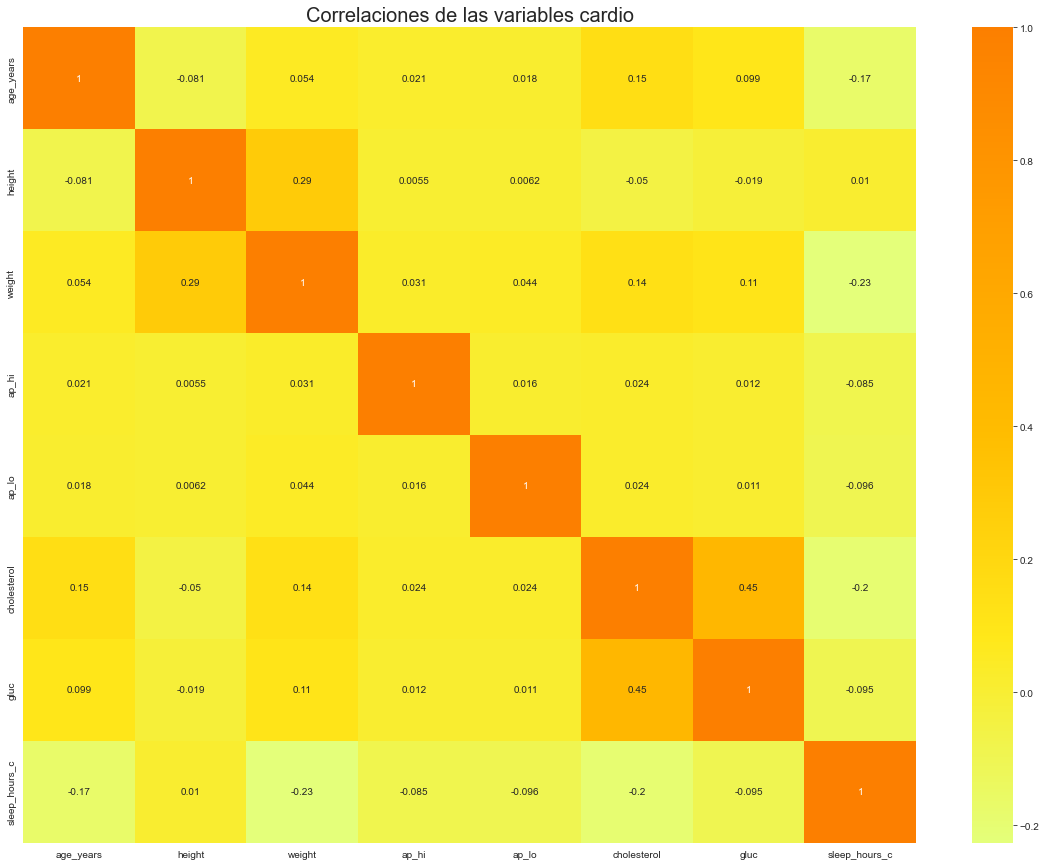

In [ ]:
#Debido a la cantidad de variables implicadas generamos un heat map que va a ser util para detectar rapidamente las correlaciones altas
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df_data_cardio_corr.corr(), annot = True, cmap = 'Wistia')
plt.title('Correlaciones de las variables cardio', fontsize = 20)
plt.show()

**INSIGHT:** La variable con correlacion mas alta positiva es "gluc" con "cholesterol", es decir, glucosa y colesterol lo cual
es esperable y no arroja resultados novedosos; por otro lado, el data set contiene una gran cantidad de variables
nominales por lo que se deberian probar con estadisticos como t-student o ANOVA para comparacion de grupos, y Cramer para
correlacionar nominales.
Por otro lado, la variable "cholesterol"  y otras como "PAS_R" y "PAD_R"
son de escala ordinal, lo que implica que se deberia probar con el metodo "spearman Rho".

In [ ]:
df_data_cardio_rho = df_data_cardio

In [ ]:
df_data_cardio_rho

age_years  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0             50     168      62    110     80            1     1   
1             55     156      85    140     90            3     1   
2             52     165      64    130     70            3     1   
3             48     169      82    150    100            1     1   
4             48     156      56    100     60            1     1   
...          ...     ...     ...    ...    ...          ...   ...   
69995         53     168      76    120     80            1     1   
69996         62     158     126    140     90            2     2   
69997         52     183     105    180     90            3     1   
69998         61     163      72    135     80            1     2   
69999         56     170      72    120     80            2     1   

       sleep_hours_c  
0               7.28  
1               5.05  
2               6.06  
3               5.15  
4               9.27  
...              ...  
69995           9.36  
69996           6.06  
69997           6.30  
69998           6.12  
69999           9.09  

[70000 rows x 8 columns]

In [ ]:
df_data_cardio_rho.columns

Index(['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'sleep_hours_c'],
      dtype='object')

In [ ]:
df_data_cardio_rho.corr(method='spearman', min_periods=1)

age_years    height    weight     ap_hi     ap_lo  cholesterol  \
age_years       1.000000 -0.083634  0.062968  0.220780  0.157957     0.141935   
height         -0.083634  1.000000  0.313574  0.019381  0.030534    -0.058940   
weight          0.062968  0.313574  1.000000  0.277758  0.254411     0.137908   
ap_hi           0.220780  0.019381  0.277758  1.000000  0.735436     0.208722   
ap_lo           0.157957  0.030534  0.254411  0.735436  1.000000     0.167401   
cholesterol     0.141935 -0.058940  0.137908  0.208722  0.167401     1.000000   
gluc            0.091777 -0.024369  0.109909  0.105334  0.082474     0.407803   
sleep_hours_c  -0.165872  0.012450 -0.223997 -0.747375 -0.538062    -0.194631   

                   gluc  sleep_hours_c  
age_years      0.091777      -0.165872  
height        -0.024369       0.012450  
weight         0.109909      -0.223997  
ap_hi          0.105334      -0.747375  
ap_lo          0.082474      -0.538062  
cholesterol    0.407803      -0.194631  
gluc           1.000000      -0.099072  
sleep_hours_c -0.099072       1.000000

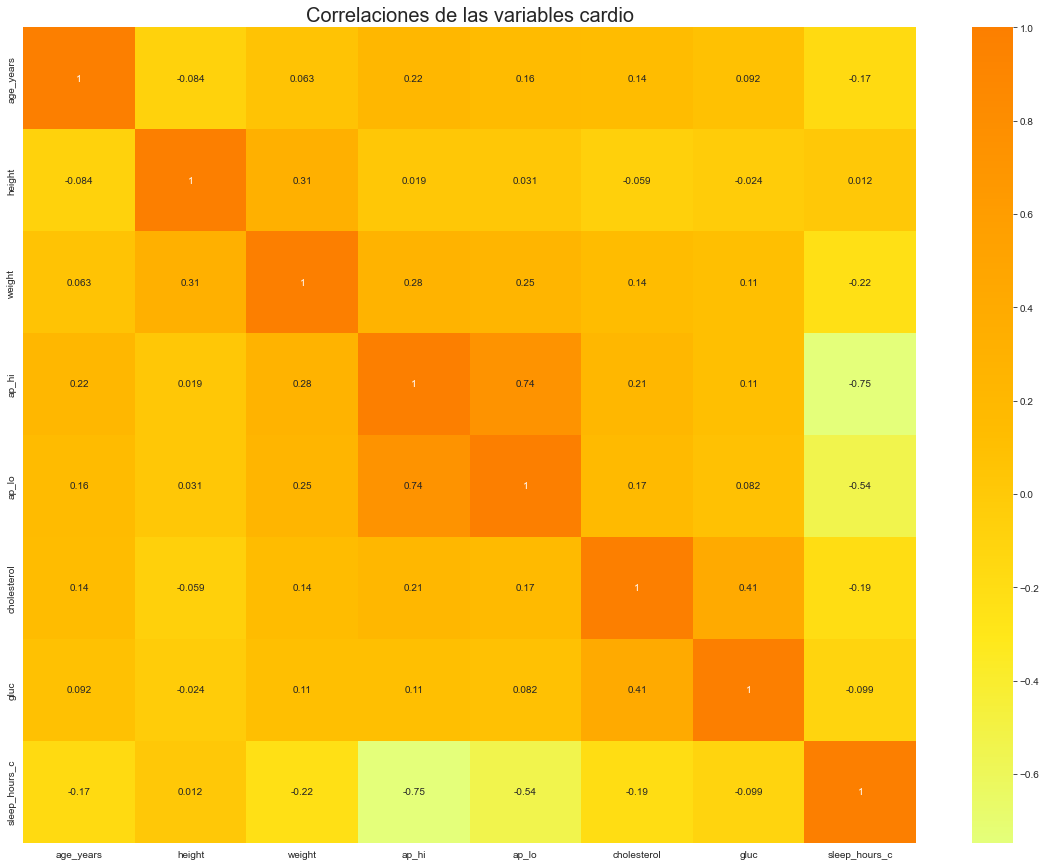

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df_data_cardio_rho.corr(method='spearman'), annot = True, cmap = 'Wistia')
plt.title('Correlaciones de las variables cardio', fontsize = 20)
plt.show()

**INSIGHT:** A PESAR DEL CAMBIO DE ESTADISTICO, COLESTEROL NO MOSTRO CORRELACIONES ALTAS

In [ ]:
#POR ULTIMO EJECUTAMOS UN PROFILE PARA OBTENER UN PRIMER INSIGHT FINAL
df_data_cardio.head()

age_years  height  weight  ap_hi  ap_lo  cholesterol  gluc  sleep_hours_c
0         50     168      62    110     80            1     1           7.28
1         55     156      85    140     90            3     1           5.05
2         52     165      64    130     70            3     1           6.06
3         48     169      82    150    100            1     1           5.15
4         48     156      56    100     60            1     1           9.27

In [ ]:
#SE CARGAN LOS DATOS COMPLETOS DE VUELTA PARA TENER TODA LA INFORMACION PARA EL PROFILE
url='https://drive.google.com/file/d/1HHEFctOru73NMkp_e6N6qsExp2Qh8Sou/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_data_cardio_profile = pd.read_csv(url,sep=',')
df_data_cardio_profile

id    age  age_years  gender  height  weight  ap_hi  ap_lo  \
0          0  18393         50  Hombre     168      62    110     80   
1          1  20228         55   Mujer     156      85    140     90   
2          2  18857         52   Mujer     165      64    130     70   
3          3  17623         48  Hombre     169      82    150    100   
4          4  17474         48   Mujer     156      56    100     60   
...      ...    ...        ...     ...     ...     ...    ...    ...   
69995  69995  19240         53  Hombre     168      76    120     80   
69996  69996  22601         62   Mujer     158     126    140     90   
69997  69997  19066         52  Hombre     183     105    180     90   
69998  69998  22431         61   Mujer     163      72    135     80   
69999  69999  20540         56   Mujer     170      72    120     80   

       cholesterol  gluc  ...  zone_residence  couple  family_history    PAS  \
0                1     1  ...           Urban       1               0  110.0   
1                3     1  ...           Urban       0               1  140.0   
2                3     1  ...           Urban       1               1  130.0   
3                1     1  ...           Urban       0               1  150.0   
4                1     1  ...           Urban       1               0  100.0   
...            ...   ...  ...             ...     ...             ...    ...   
69995            1     1  ...           Urban       1               0  120.0   
69996            2     2  ...           Urban       0               0  140.0   
69997            3     1  ...           Urban       1               1  180.0   
69998            1     2  ...           Urban       0               0  135.0   
69999            2     1  ...           Urban       0               0  120.0   

         PAD   PAS_R   PAD_R   PAS_C  PAD_C  Unnamed: 25  
0       80.0  Normal  Normal  111.10   80.8          NaN  
1       90.0  Normal  Normal  142.80   91.8          NaN  
2       70.0  Normal  Riesgo  132.60   71.4          NaN  
3      100.0  Riesgo  Normal  153.00  102.0          NaN  
4       70.0  Normal  Riesgo  101.00   70.7          NaN  
...      ...     ...     ...     ...    ...          ...  
69995   80.0  Normal  Normal  121.20   80.8          NaN  
69996   90.0  Normal  Normal  142.80   91.8          NaN  
69997   90.0  Riesgo  Normal  183.60   91.8          NaN  
69998   80.0  Normal  Normal  136.35   80.8          NaN  
69999   80.0  Normal  Normal  121.20   80.8          NaN  

[70000 rows x 26 columns]

In [ ]:
df_data_cardio_profile.columns

Index(['id', 'age', 'age_years', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio_d',
       'sleep_hours', 'sleep_hours_c', 'zone_residence', 'couple',
       'family_history', 'PAS', 'PAD', 'PAS_R', 'PAD_R', 'PAS_C', 'PAD_C',
       'Unnamed: 25'],
      dtype='object')

In [ ]:
df_data_cardio_profile.drop('id', axis=1, inplace=True)
df_data_cardio_profile.drop('age', axis=1, inplace=True)
df_data_cardio_profile.drop('PAS', axis=1, inplace=True)
df_data_cardio_profile.drop('PAD', axis=1, inplace=True)
df_data_cardio_profile.drop('PAS_C', axis=1, inplace=True)
df_data_cardio_profile.drop('PAD_C', axis=1, inplace=True)
df_data_cardio_profile.drop('Unnamed: 25', axis=1, inplace=True)

In [ ]:
profile_cardio = pandas_profiling.ProfileReport(df_data_cardio_profile)
profile_cardio

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**INSIGHT:** En el profiling mediante el coeficiente de correlacion de Cramer podemos ver una correlacion alta entre "family_history" y "cardio_d" es decir, entre antecedentes de enfermedades cardiovasculares familiares y enfermedad cardiovascular diagnosticada.

In [ ]:
df_data_cardio_profile.head(5)

age_years  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0         50  Hombre     168      62    110     80            1     1      0   
1         55   Mujer     156      85    140     90            3     1      0   
2         52   Mujer     165      64    130     70            3     1      0   
3         48  Hombre     169      82    150    100            1     1      0   
4         48   Mujer     156      56    100     60            1     1      0   

   alco  active  cardio_d  sleep_hours  sleep_hours_c zone_residence  couple  \
0     0       1         0            7           7.28          Urban       1   
1     0       1         1            5           5.05          Urban       0   
2     0       0         1            6           6.06          Urban       1   
3     0       1         1            5           5.15          Urban       0   
4     0       0         0            9           9.27          Urban       1   

   family_history   PAS_R   PAD_R  
0               0  Normal  Normal  
1               1  Normal  Normal  
2               1  Normal  Riesgo  
3               1  Riesgo  Normal  
4               0  Normal  Riesgo

**CONCLUSIONES GENERALES PRELIMINARES**

Horas de sueño
Se encontró una asociación negativa entre horas de sueño (ordinal) y presión arterial (Rho = -.75, sistólica; (Rho = -.54, diastólica). Lo cual significa que cuanto mayor las horas de sueño, menor es la presión arterial, lo que sugiere que tener un buen descanso contribuye a mantener una buena salud cardiaca.

Historia familiar
Se encontró una asociación moderada entre historia familiar y el padecer de una enfermedad cardiaca (Cramer = .60). Esto sugiere que el tener antecedentes familiares de enfermedad puede ser un predictor de contraer la enfermedad.

Colesterol
El colesterol parece ser una variable relevante en investigaciones anteriores. En este análisis se registró una correlación pequeña entre horas de sueño y colesterol donde a mayo cantidad de horas de sueño menores niveles de colesterol (r= -.20). Estos resultados sugieren que el dormir lo suficiente contribuye también a tener niveles bajos de colesterol.

**DISCUSIÓN**

Debido a los análisis exploratorios anteriores podemos identificar 4 variables de mayor relevancia como posibles predictoras de contraer enfermedades cardiacas, son: la presión arterial (sistólica y diastólica), horas de sueño, historia familiar y colesterol en ese orden.
En este sentido, nos proponemos para continuar con el análisis los siguientes puntos:

1-	Realizar un Análisis de Componentes Principales (PCA, por sus siglas en ingles), con las cuatro variables mencionadas, con historia familiar como variable categórica.

2-	Realizar un gráfico de dispersión con horas de sueño y colesterol, donde se tomará a la variable presión arterial (sistólica y diastólica) como dependiente y se compararan con Cardio_d (enfermedad cardiaca sí o no).

3-	En caso de encontrar correlaciones altas en el punto 2, generar un modelo predictivo con un algoritmo de clasificación con Cardio_d como variable objetivo.
